In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os, django

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from django.db.models import Q, F, Sum, Count, FloatField, Case, When, Value, Max
from sklearn.manifold import TSNE
from scoping.models import *
from scoping.views import *
from tmv_app.views import *

now=datetime.datetime.now()

In [3]:
pid = 217
qid = 7966
q = Query.objects.get(pk=qid)
p = Project.objects.get(pk=pid)

In [4]:
docs = Doc.objects.filter(query=q, content__iregex='\w').values_list('pk', flat=True)

print(docs.count())

seen = set(DocOwnership.objects.filter(
    query=q, 
    relevant__gt=0
).values_list('doc__pk', flat=True))


seen = seen & set(docs)

seen_docs = Doc.objects.filter(pk__in=seen)
seen_docs.count()

94944


3000

In [8]:
climate_docs = set(Doc.objects.filter(query=6187).values_list('pk',flat=True))

q_set = set(docs)

print(f"query docs: {len(q_set)}")

print(f"climate docs: {len(climate_docs)}")



query docs: 94944
climate docs: 407957
overlap: 94944


In [13]:
t = Topic.objects.get(pk=170476)
print(t)
dts = DocTopic.objects.filter(topic=t)
dtdf = pd.DataFrame.from_dict(dts.values('doc__id','score'))
dtdf.head()

adaptation, adaptation & vulnerability


,doc__id,score
0,321191,0.000559
1,680604,0.000777
2,517208,0.000239
3,4025,0.000112
4,365998,0.000585


<BarContainer object of 3 artists>

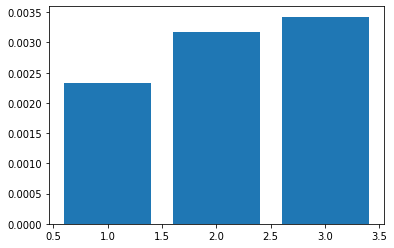

In [44]:
fig, ax = plt.subplots()
ax.bar(
    [1,2,3],
    [
        dtdf.score.mean(), 
        dtdf[dtdf['doc__id'].isin(q_set)].score.mean(), 
        dtdf[dtdf['doc__id'].isin(seen)].score.mean()
    ]
)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['all climate',''])


0.003178223956419766

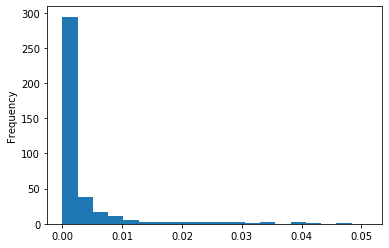